In [1]:
!uname -a

Linux 1b072111a688 5.15.107+ #1 SMP Sat Apr 29 09:15:28 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Импорт библиотек

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Шаг 1: Создание датасетов

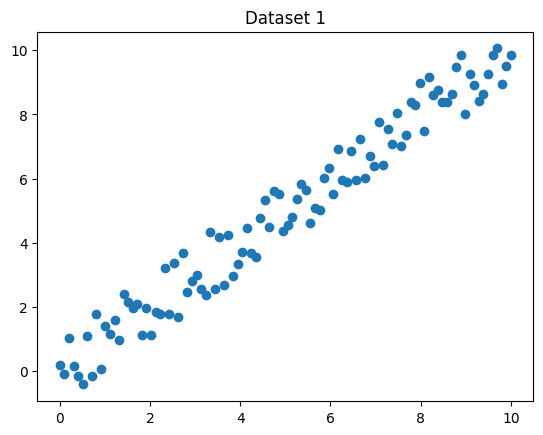

In [4]:
# Датасет 1
xs1 = np.linspace(0, 10, 100)
ys1 = xs1 + np.random.random(100)*2 - 1

plt.scatter(xs1, ys1)
plt.title("Dataset 1")
plt.show()

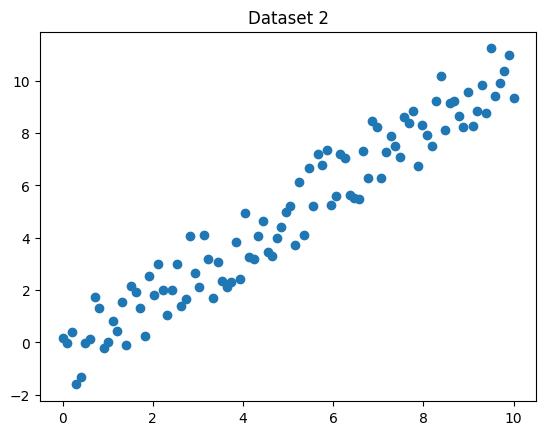

In [57]:
# Датасет 2
xs2 = np.linspace(0, 10, 100)
ys2 = 1.1*xs2 + np.random.random(100)*3 - 2

plt.scatter(xs2, ys2)
plt.title("Dataset 2")
plt.show()

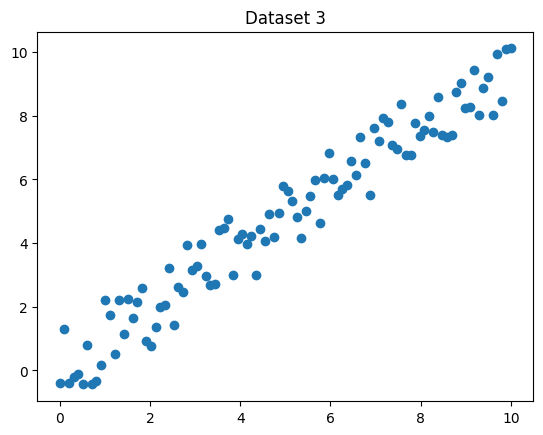

In [70]:
# Датасет 3
xs3 = np.linspace(0, 10, 100)
ys3 = 0.95*xs3 + np.random.random(100)*2.5 - 1.2

plt.scatter(xs3, ys3)
plt.title("Dataset 3")
plt.show()

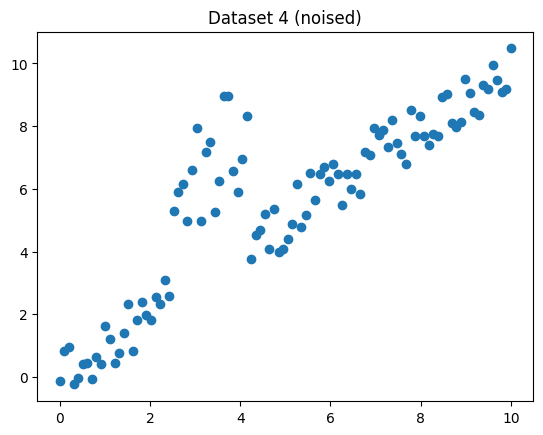

In [7]:
# Датасет 4 (с шумами)
xs4 = np.linspace(0, 10, 100)
ys4 = xs4 + np.random.random(100)*2 - 1
ys4[25:42] *= 2

plt.scatter(xs4, ys4)
plt.title("Dataset 4 (noised)")
plt.show()

### Шаг 2: Обучение модели линейной регрессии на одном из датасетов

In [8]:
X_train = xs1.reshape(-1, 1)
y_train = ys1

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Шаг 3: Анализ качества предсказания

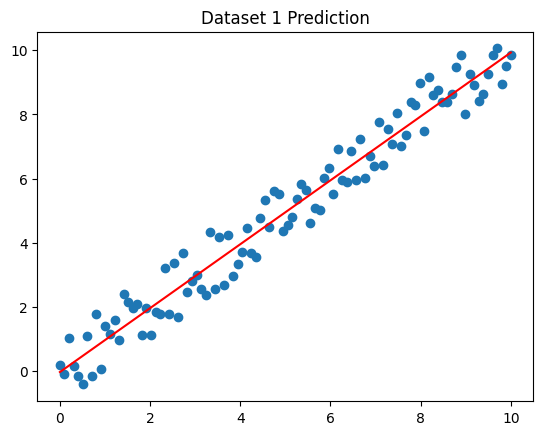

MSE for Dataset 1: 0.36
R2 for Dataset 1: 0.96
Coefficients for Dataset 1: 1.00



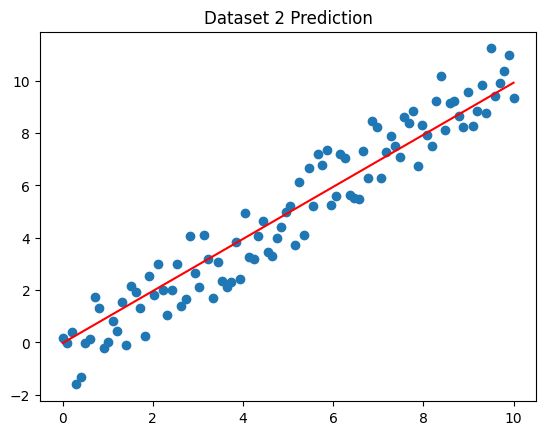

MSE for Dataset 2: 0.83
R2 for Dataset 2: 0.92
Coefficients for Dataset 2: 1.00



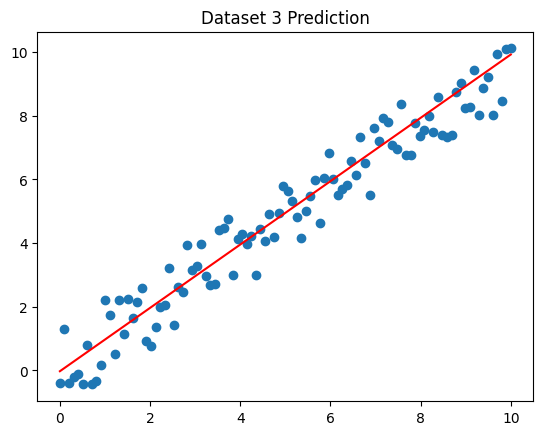

MSE for Dataset 3: 0.49
R2 for Dataset 3: 0.94
Coefficients for Dataset 3: 1.00



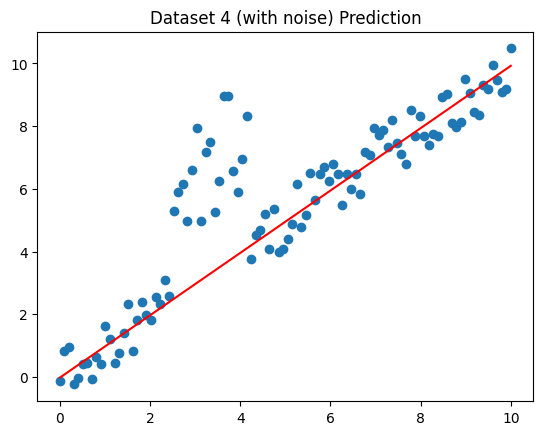

MSE for Dataset 4 (with noise): 2.43
R2 for Dataset 4 (with noise): 0.71
Coefficients for Dataset 4 (with noise): 1.00



In [71]:
# Функция для анализа качества предсказания и записи данных
def analyze_predictions(xs, ys, dataset_name, idx):
    y_pred = model.predict(xs.reshape(-1, 1))

    np.savetxt(f"ys_{idx}.csv", ys, delimiter=",")
    np.savetxt(f"y_pred_{idx}.csv", y_pred, delimiter=",")

    plt.scatter(xs, ys)
    plt.plot(xs.reshape(-1, 1), y_pred, color="red")
    plt.title(f"{dataset_name} Prediction")
    plt.show()

    print(f"MSE for {dataset_name}: %.2f" % mean_squared_error(ys, y_pred))
    print(f"R2 for {dataset_name}: %.2f" % r2_score(ys, y_pred))
    print(f"Coefficients for {dataset_name}: %.2f" % model.coef_)
    print()

# Анализ качества предсказания на всех датасетах
analyze_predictions(xs1, ys1, "Dataset 1", 1)
analyze_predictions(xs2, ys2, "Dataset 2", 2)
analyze_predictions(xs3, ys3, "Dataset 3", 3)
analyze_predictions(xs4, ys4, "Dataset 4 (with noise)", 4)

### Шаг 4: Обнаружение проблемы на датасете 4 (с шумами)

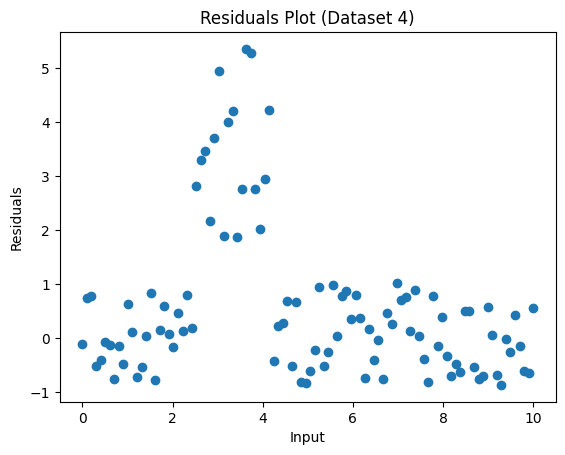

In [26]:
# Анализ остатков модели на датасете 4
y_pred4 = model.predict(xs4.reshape(-1, 1))
residuals = ys4 - y_pred4.flatten()

plt.scatter(xs4, residuals)
plt.xlabel("Input")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Dataset 4)")
plt.show()

Судя по анализу остатков модели, то есть разницы между фактическими значениями и предсказанными значениями, остатки показывают некоторую структуру или паттерн, что может указывать на проблему в модели или неучтённые факторы в данных. Проведём тестирование данных.

### Шаг 5: Тестирование работы модели на всех 4 датасетах

In [53]:
%%writefile test_score.py
import numpy as np
import pytest
from sklearn.metrics import mean_squared_error, r2_score


@pytest.fixture
def load_ys():
    ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    return ys

@pytest.fixture
def load_y_pred():
    y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    return(y_pred)

def test_mse(load_ys, load_y_pred):
    for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
        assert mean_squared_error(ys, y_pred) < 1, f"Test failed for file: ys_{idx}.csv"

def test_r2(load_ys, load_y_pred):
    for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
        assert r2_score(ys, y_pred) > 0.9, f"Test failed for file: ys_{idx}.csv"

Overwriting test_score.py


In [59]:
!cat test_score.py

import numpy as np
import pytest
from sklearn.metrics import mean_squared_error, r2_score


@pytest.fixture
def load_ys():
    ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    return ys

@pytest.fixture
def load_y_pred():
    y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]
    return(y_pred)

def test_mse(load_ys, load_y_pred):
    for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
        assert mean_squared_error(ys, y_pred) < 1, f"Test failed for file: ys_{idx}.csv"

def test_r2(load_ys, load_y_pred):
    for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
        assert r2_score(ys, y_pred) > 0.9, f"Test failed for file: ys_{idx}.csv"


In [72]:
!pytest -v test_score.py

============================= test session starts ==============================
platform linux -- Python 3.10.11, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score.py::test_mse FAILED                                           [ 50%]
test_score.py::test_r2 FAILED                                            [100%]

=================================== FAILURES ===================================
___________________________________ test_mse ___________________________________

load_ys = [array([ 0.20776638, -0.10110731,  1.05047284,  0.14945664, -0.14733977,
       -0.41185957,  1.11108937, -0.16267211,...06823,  8.35397978,  9.29829568,  9.17129888,
        9.94792661,  9.48002679,  9.10563064,  9.173836  , 10.47874527])]
load_y_pred = [array([-0.02469478,  0.07581182,  0.17631842,  0.27682502,  0.37733161,
        0.47783821,  0.57834481,

#### Юнит-тест

In [48]:
!mkdir test_module

mkdir: cannot create directory ‘test_module’: File exists


In [49]:
%%writefile test_module/test_unit.py
import numpy as np
import unittest
from sklearn.metrics import mean_squared_error, r2_score


class TestMethods(unittest.TestCase):

    def test_mse(self):
        load_ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
        load_y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]

        for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
            self.assertLess(mean_squared_error(ys, y_pred), 1, f"Test failed for dataset {idx}")
    
    def test_r2(self):
        load_ys = [np.loadtxt(f"ys_{idx}.csv", delimiter=",") for idx in range(1, 5)]
        load_y_pred = [np.loadtxt(f"y_pred_{idx}.csv", delimiter=",") for idx in range(1, 5)]

        for idx, (ys, y_pred) in enumerate(zip(load_ys, load_y_pred), start=1):
            self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset {idx}")

if __name__ == '__main__':
    unittest.main()


Overwriting test_module/test_unit.py


In [73]:
!python -m unittest test_module/test_unit.py

FF
FAIL: test_mse (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 13, in test_mse
    self.assertLess(mean_squared_error(ys, y_pred), 1, f"Test failed for dataset {idx}")
AssertionError: 2.4305114232090914 not less than 1 : Test failed for dataset 4

FAIL: test_r2 (test_module.test_unit.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/test_module/test_unit.py", line 20, in test_r2
    self.assertGreater(r2_score(ys, y_pred), 0.9, f"Test failed for dataset {idx}")
AssertionError: 0.7109934892252407 not greater than 0.9 : Test failed for dataset 4

----------------------------------------------------------------------
Ran 2 tests in 0.009s

FAILED (failures=2)
